In [57]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
from matplotlib.lines import Line2D
import pandas as pd
from information_metrics import *
from pickle import dump, load
from scipy.stats import spearmanr
import warnings; warnings.simplefilter("ignore")

In [2]:
%%html
<style>
.container {
    width: 95% !important
}
</style>

In [3]:
Site_Info = pd.read_csv('C://Users/ppushpendra/Box/SW_FluxNet_NEW/SiteInfo/all_sites_names_FluxNet.csv')
sites = os.listdir('C://Users/ppushpendra/Box/SW_FluxNet_NEW/Input_Data/')
sites = [x[0:6] for x in sites]
sites.sort()
sites = np.unique(sites)
sites

array(['AR-SLu', 'AT-Neu', 'AU-ASM', 'AU-Cpr', 'AU-Cum', 'AU-DaP',
       'AU-DaS', 'AU-Dry', 'AU-Emr', 'AU-GWW', 'AU-Gin', 'AU-How',
       'AU-Rig', 'AU-Stp', 'AU-TTE', 'AU-Tum', 'AU-Ync', 'BE-Lon',
       'BE-Vie', 'BR-Sa3', 'CA-NS1', 'CA-NS2', 'CA-NS4', 'CA-NS5',
       'CA-NS6', 'CA-NS7', 'CA-Qfo', 'CA-SF1', 'CA-SF2', 'CA-SF3',
       'CH-Cha', 'CH-Dav', 'CH-Fru', 'CH-Oe1', 'CN-Cha', 'CN-Cng',
       'CN-Dan', 'CN-Din', 'CN-Du2', 'CN-HaM', 'CN-Qia', 'DE-Geb',
       'DE-Gri', 'DE-Hai', 'DE-Kli', 'DE-Obe', 'DE-Seh', 'DE-Tha',
       'ES-LgS', 'FI-Hyy', 'FI-Sod', 'FR-Gri', 'FR-LBr', 'GF-Guy',
       'IT-BCi', 'IT-CA1', 'IT-CA2', 'IT-CA3', 'IT-Col', 'IT-Cpz',
       'IT-Isp', 'IT-Lav', 'IT-MBo', 'IT-Noe', 'IT-PT1', 'IT-Ren',
       'IT-Ro1', 'IT-Ro2', 'IT-SR2', 'IT-SRo', 'NL-Loo', 'RU-Fyo',
       'SD-Dem', 'US-AR1', 'US-AR2', 'US-ARM', 'US-Blo', 'US-Cop',
       'US-GLE', 'US-Goo', 'US-KS2', 'US-MMS', 'US-Me2', 'US-Me4',
       'US-Me6', 'US-NR1', 'US-Ne1', 'US-Ne2', 'US-Ne3', 'US-S

In [4]:
target = "LE_pred"
target_o = 'LE_c'
source_1 = "theta"
source_2 = "VPD"
n_bins = 15
norm = 1
dfs = []
for site_name in sites:
    print("----" + site_name + "----")
    LC = Site_Info['LC'][Site_Info['site']==site_name].values[0]
    try:
        # EMP
        df_emp = pd.read_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/EMP/Output/All_predictions_" + site_name + "_log_rsc_LEc_day.csv")
        p25_emp = np.percentile(df_emp['theta_2'].values, 25)
        p75_emp = np.percentile(df_emp['theta_2'].values, 75)
        df_dry_emp = df_emp[df_emp['theta_2'] <= p25_emp].copy()
        df_med_emp = df_emp[(df_emp['theta_2'] < p75_emp) & (df_emp['theta_2'] > p25_emp)].copy()
        df_wet_emp = df_emp[df_emp['theta_2'] >= p75_emp].copy()
        for category, df_category in zip(['All', 'Dry', 'Mesic', 'Wet'], [df_emp, df_dry_emp, df_med_emp, df_wet_emp]):
            stats = cal_it_performance(df_category, target, target_o, source_1, source_2, nbins=n_bins, norm=norm)
            dfs.append(pd.DataFrame({'Site': site_name, 'Model': 'EMP', 'Category': category, **stats}, index=[0]))
            
        # EXP
        df_exp = pd.read_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/PH_EXP/Output/All_predictions_" + site_name + "_log_rsc_LEc_day.csv")
        p25_exp = np.percentile(df_exp['theta_2'].values, 25)
        p75_exp = np.percentile(df_exp['theta_2'].values, 75)
        df_dry_exp = df_exp[df_exp['theta_2'] <= p25_exp].copy()
        df_med_exp = df_exp[(df_exp['theta_2'] < p75_exp) & (df_exp['theta_2'] > p25_exp)].copy()
        df_wet_exp = df_exp[df_exp['theta_2'] >= p75_exp].copy()
        for category, df_category in zip(['All', 'Dry', 'Mesic', 'Wet'], [df_exp, df_dry_exp, df_med_exp, df_wet_exp]):
            stats = cal_it_performance(df_category, target, target_o, source_1, source_2, nbins=n_bins, norm=norm)
            dfs.append(pd.DataFrame({'Site': site_name, 'Model': 'EXP', 'Category': category, **stats}, index=[0]))
            
        # EXP_v2
        df_exp_v2 = pd.read_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/PH_EXP/Output/All_predictions_" + site_name + "_log_rsc_LEc_day_v2.csv")
        p25_exp_v2 = np.percentile(df_exp_v2['theta_2'].values, 25)
        p75_exp_v2 = np.percentile(df_exp_v2['theta_2'].values, 75)
        df_dry_exp_v2 = df_exp_v2[df_exp_v2['theta_2'] <= p25_exp_v2].copy()
        df_med_exp_v2 = df_exp_v2[(df_exp_v2['theta_2'] < p75_exp_v2) & (df_exp_v2['theta_2'] > p25_exp_v2)].copy()
        df_wet_exp_v2 = df_exp_v2[df_exp_v2['theta_2'] >= p75_exp_v2].copy()
        for category, df_category in zip(['All', 'Dry', 'Mesic', 'Wet'], [df_exp_v2, df_dry_exp_v2, df_med_exp_v2, df_wet_exp_v2]):
            stats = cal_it_performance(df_category, target, target_o, source_1, source_2, nbins=n_bins, norm=norm)
            dfs.append(pd.DataFrame({'Site': site_name, 'Model': 'EXP_v2', 'Category': category, **stats}, index=[0]))
            
        # IMP
        df_imp = pd.read_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/PH_IMP/Predictions/All_predictions_" + site_name + "_log_rsc_LEc_day.csv")
        p25_imp = np.percentile(df_imp['theta_2'].values, 25)
        p75_imp = np.percentile(df_imp['theta_2'].values, 75)
        df_dry_imp = df_imp[df_imp['theta_2'] <= p25_imp].copy()
        df_med_imp = df_imp[(df_imp['theta_2'] < p75_imp) & (df_imp['theta_2'] > p25_imp)].copy()
        df_wet_imp = df_imp[df_imp['theta_2'] >= p75_imp].copy()
        for category, df_category in zip(['All', 'Dry', 'Mesic', 'Wet'], [df_imp, df_dry_imp, df_med_imp, df_wet_imp]):
            stats = cal_it_performance(df_category, target, target_o, source_1, source_2, nbins=n_bins, norm=norm)
            dfs.append(pd.DataFrame({'Site': site_name, 'Model': 'IMP', 'Category': category, **stats}, index=[0]))
            
        # IMP_v2
        df_imp_v2 = pd.read_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/PH_IMP/Predictions/All_predictions_" + site_name + "_log_rsc_LEc_day_v2.csv")
        p25_imp_v2 = np.percentile(df_imp_v2['theta_2'].values, 25)
        p75_imp_v2 = np.percentile(df_imp_v2['theta_2'].values, 75)
        df_dry_imp_v2 = df_imp_v2[df_imp_v2['theta_2'] <= p25_imp_v2].copy()
        df_med_imp_v2 = df_imp_v2[(df_imp_v2['theta_2'] < p75_imp_v2) & (df_imp_v2['theta_2'] > p25_imp_v2)].copy()
        df_wet_imp_v2 = df_imp_v2[df_imp_v2['theta_2'] >= p75_imp_v2].copy()
        for category, df_category in zip(['All', 'Dry', 'Mesic', 'Wet'], [df_imp_v2, df_dry_imp_v2, df_med_imp_v2, df_wet_imp_v2]):
            stats = cal_it_performance(df_category, target, target_o, source_1, source_2, nbins=n_bins, norm=norm)
            dfs.append(pd.DataFrame({'Site': site_name, 'Model': 'IMP_v2', 'Category': category, **stats}, index=[0]))
            
        # ML
        df_ML = pd.read_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/ML/Predictions/All_predictions_" + site_name + "_log_rsc_LEc_day.csv")
        p25_ML = np.percentile(df_ML['theta_2'].values, 25)
        p75_ML = np.percentile(df_ML['theta_2'].values, 75)
        df_dry_ML = df_ML[df_ML['theta_2'] <= p25_ML].copy()
        df_med_ML = df_ML[(df_ML['theta_2'] < p75_ML) & (df_ML['theta_2'] > p25_ML)].copy()
        df_wet_ML = df_ML[df_ML['theta_2'] >= p75_ML].copy()
        for category, df_category in zip(['All', 'Dry', 'Mesic', 'Wet'], [df_ML, df_dry_ML, df_med_ML, df_wet_ML]):
            stats = cal_it_performance(df_category, target, target_o, source_1, source_2, nbins=n_bins, norm=norm)
            dfs.append(pd.DataFrame({'Site': site_name, 'Model': 'ML', 'Category': category, **stats}, index=[0]))
            
        # ML (XGB)
        df_ML_XGB = pd.read_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/ML_XGBoost/Predictions/All_predictions_" + site_name + "_log_rsc_LEc_day.csv")
        p25_ML_XGB = np.percentile(df_ML_XGB['theta_2'].values, 25)
        p75_ML_XGB = np.percentile(df_ML_XGB['theta_2'].values, 75)
        df_dry_ML_XGB = df_ML_XGB[df_ML_XGB['theta_2'] <= p25_ML_XGB].copy()
        df_med_ML_XGB = df_ML_XGB[(df_ML_XGB['theta_2'] < p75_ML_XGB) & (df_ML_XGB['theta_2'] > p25_ML_XGB)].copy()
        df_wet_ML_XGB = df_ML_XGB[df_ML_XGB['theta_2'] >= p75_ML_XGB].copy()
        for category, df_category in zip(['All', 'Dry', 'Mesic', 'Wet'], [df_ML_XGB, df_dry_ML_XGB, df_med_ML_XGB, df_wet_ML_XGB]):
            stats = cal_it_performance(df_category, target, target_o, source_1, source_2, nbins=n_bins, norm=norm)
            dfs.append(pd.DataFrame({'Site': site_name, 'Model': 'ML_XGB', 'Category': category, **stats}, index=[0])) 
    except:
        pass
im_df = pd.concat(dfs, ignore_index=True)

----AR-SLu----
----AT-Neu----
----AU-ASM----
----AU-Cpr----
----AU-Cum----
----AU-DaP----
----AU-DaS----
----AU-Dry----
----AU-Emr----
----AU-GWW----
----AU-Gin----
----AU-How----
----AU-Rig----
----AU-Stp----
----AU-TTE----
----AU-Tum----
----AU-Ync----
----BE-Lon----
----BE-Vie----
----BR-Sa3----
----CA-NS1----
----CA-NS2----
----CA-NS4----
----CA-NS5----
----CA-NS6----
----CA-NS7----
----CA-Qfo----
----CA-SF1----
----CA-SF2----
----CA-SF3----
----CH-Cha----
----CH-Dav----
----CH-Fru----
----CH-Oe1----
----CN-Cha----
----CN-Cng----
----CN-Dan----
----CN-Din----
----CN-Du2----
----CN-HaM----
----CN-Qia----
----DE-Geb----
----DE-Gri----
----DE-Hai----
----DE-Kli----
----DE-Obe----
----DE-Seh----
----DE-Tha----
----ES-LgS----


C:\Users\ppushpendra\Box\SW_FluxNet_NEW\fresh_run_all_models\Models\Post_Decision_Analysis\WRR\REVIEW_1\Analysis_Codes\Python\Information_Metrics\information_metrics.py:25: RuntimeWarning: invalid value encountered in true_divide
  p = c / np.sum(c)
C:\Users\ppushpendra\Box\SW_FluxNet_NEW\fresh_run_all_models\Models\Post_Decision_Analysis\WRR\REVIEW_1\Analysis_Codes\Python\Information_Metrics\information_metrics.py:25: RuntimeWarning: invalid value encountered in true_divide
  p = c / np.sum(c)
C:\Users\ppushpendra\Box\SW_FluxNet_NEW\fresh_run_all_models\Models\Post_Decision_Analysis\WRR\REVIEW_1\Analysis_Codes\Python\Information_Metrics\information_metrics.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  i = mi_s1_s2 / np.min([H_s1, H_s2])
C:\Users\ppushpendra\Box\SW_FluxNet_NEW\fresh_run_all_models\Models\Post_Decision_Analysis\WRR\REVIEW_1\Analysis_Codes\Python\Information_Metrics\information_metrics.py:146: RuntimeWarning: invalid value encountered in double_sc

C:\Users\ppushpendra\Box\SW_FluxNet_NEW\fresh_run_all_models\Models\Post_Decision_Analysis\WRR\REVIEW_1\Analysis_Codes\Python\Information_Metrics\information_metrics.py:25: RuntimeWarning: invalid value encountered in true_divide
  p = c / np.sum(c)
C:\Users\ppushpendra\Box\SW_FluxNet_NEW\fresh_run_all_models\Models\Post_Decision_Analysis\WRR\REVIEW_1\Analysis_Codes\Python\Information_Metrics\information_metrics.py:25: RuntimeWarning: invalid value encountered in true_divide
  p = c / np.sum(c)
C:\Users\ppushpendra\Box\SW_FluxNet_NEW\fresh_run_all_models\Models\Post_Decision_Analysis\WRR\REVIEW_1\Analysis_Codes\Python\Information_Metrics\information_metrics.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  i = mi_s1_s2 / np.min([H_s1, H_s2])
C:\Users\ppushpendra\Box\SW_FluxNet_NEW\fresh_run_all_models\Models\Post_Decision_Analysis\WRR\REVIEW_1\Analysis_Codes\Python\Information_Metrics\information_metrics.py:146: RuntimeWarning: invalid value encountered in double_sc

----FI-Hyy----
----FI-Sod----
----FR-Gri----
----FR-LBr----
----GF-Guy----
----IT-BCi----
----IT-CA1----
----IT-CA2----
----IT-CA3----
----IT-Col----
----IT-Cpz----
----IT-Isp----
----IT-Lav----
----IT-MBo----
----IT-Noe----
----IT-PT1----
----IT-Ren----
----IT-Ro1----
----IT-Ro2----
----IT-SR2----
----IT-SRo----
----NL-Loo----
----RU-Fyo----
----SD-Dem----
----US-AR1----
----US-AR2----
----US-ARM----
----US-Blo----
----US-Cop----
----US-GLE----
----US-Goo----
----US-KS2----
----US-MMS----
----US-Me2----
----US-Me4----
----US-Me6----
----US-NR1----
----US-Ne1----
----US-Ne2----
----US-Ne3----
----US-SRG----
----US-SRM----
----US-Syv----
----US-Ton----
----US-UMB----
----US-Var----
----US-WCr----
----US-Whs----
----US-Wkg----
----ZA-Kru----
----ZM-Mon----


In [5]:
im_df

,Site,Model,Category,a_p,a_fu1,a_fu2,a_fs,a_fr,a_ft,a_fp
0,AR-SLu,EMP,All,0.750542,0.111981,-0.001333,-0.118528,0.007881,0.515745,0.239723
1,AR-SLu,EMP,Dry,0.721928,0.033744,0.142788,-0.182303,0.005771,0.065384,0.364606
2,AR-SLu,EMP,Mesic,0.760723,0.043629,0.113018,-0.160516,0.003869,0.227425,0.321031
3,AR-SLu,EMP,Wet,0.744235,0.139023,0.127985,-0.294658,0.027650,0.137586,0.589315
4,AR-SLu,EXP,All,0.765729,0.036996,0.137997,-0.178188,0.003195,0.347381,0.356376
...,...,...,...,...,...,...,...,...,...,...
2107,ZM-Mon,ML,Wet,0.713732,-0.000911,0.152276,-0.151312,-0.000052,0.157322,0.304552
2108,ZM-Mon,ML_XGB,All,0.538123,0.000753,0.002496,-0.003730,0.000481,0.221349,0.007460
2109,ZM-Mon,ML_XGB,Dry,0.670570,0.061865,0.074987,-0.151879,0.015027,0.293576,0.303759
2110,ZM-Mon,ML_XGB,Mesic,0.570302,0.051017,0.000774,-0.051914,0.000123,0.221491,0.103828


In [6]:
im_df.to_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/information_metrics.csv", index=False)

In [7]:
im_df = pd.read_csv("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/information_metrics.csv")

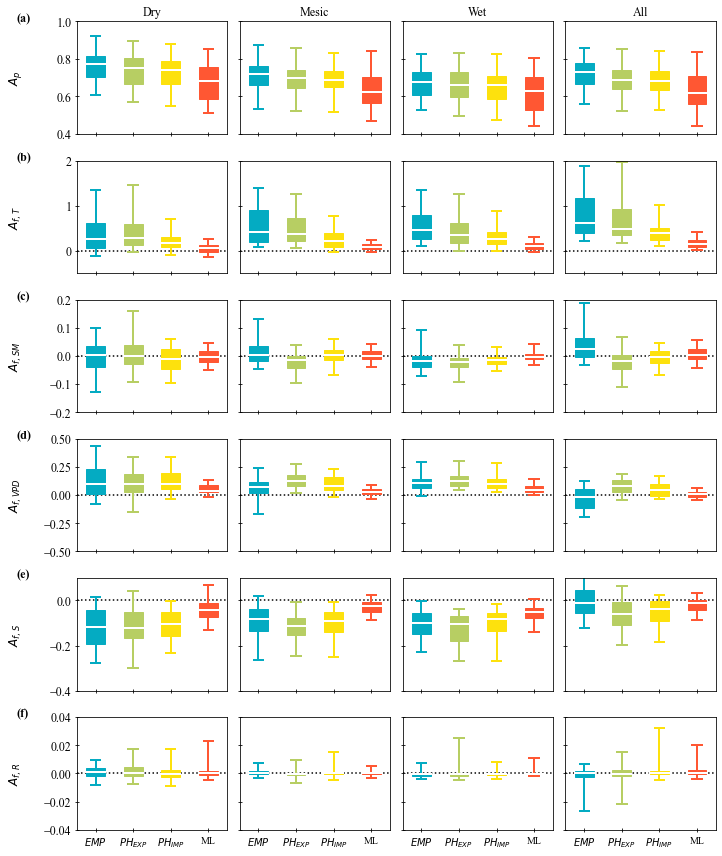

In [115]:
mod_list_labels = [r'EMP', r'EXP', r'IMP', r'ML']
mod_list_labels_alt = [r'$EMP$', r'$PH_{EXP}$', r'$PH_{IMP}$', r'ML']
model_colors = ['#04ABC2', '#B7CE63', '#FDE10D', '#FF5733']
fig = plt.figure(figsize=(10, 12))
positions=range(1, len(mod_list_labels) + 1)
iter_criteria = [['a_p', r'$A_{p}$', 0.4, 1],
                 ['a_ft', r'$A_{f, T}$', -0.5, 2],
                  ['a_fu1', r'$A_{f, SM}$', -0.2, 0.2],
                  ['a_fu2', r'$A_{f, VPD}$', -0.5, 0.5],
                  ['a_fs', r'$A_{f, S}$', -0.4, 0.1],
                  ['a_fr', r'$A_{f, R}$',  -0.04, 0.04],
                  ]
for spi, (a_i, a_i_name, ymin, ymax) in enumerate(iter_criteria):
    for cii, condition in enumerate(['Dry', 'Mesic', 'Wet', 'All']):
        ax = fig.add_subplot(6, 4, 1 + cii + 4 * spi)
        if a_i == 'a_p':
            ax.title.set_text(condition)

        ax.axhline(0, linestyle=':', color='k')
        for i, c in enumerate(model_colors):
            x = im_df[a_i][(im_df['Category']==condition) & (im_df['Model']==mod_list_labels[i])]
            x = x.dropna()
            ax.boxplot([x, ], positions=[positions[i], ], showfliers=False, 
                           whis=whis, widths=0.5, patch_artist=True,
                           boxprops=dict(facecolor=c, color=c),
                           medianprops=dict(color='w', lw=2), flierprops=dict(markeredgecolor=c),
                           capprops=dict(color=c, lw=2), whiskerprops=dict(color=c, lw=2))

        ax.tick_params(direction='inout', labelsize=12)
        ax.set_ylim([ymin, ymax])
        ax.set_xlim([0.5, len(mod_list_labels) + 0.5])
        if condition == "Dry":
            ax.annotate(f'({chr(97+spi)})', xy=(-0.4, 1), xycoords='axes fraction', fontsize=12, weight='bold')
        if a_i == 'a_fr':
            ax.set_xticks(positions)
            ax.set_xticklabels(mod_list_labels_alt, fontsize=10)
        else:
            ax.set_xticks(positions)
            ax.set_xticklabels([])
        if condition != 'Dry':
            ax.set_yticklabels([])
        else:
            ax.set_ylabel(a_i_name, fontsize=12)
            ax.get_yaxis().set_label_coords(-0.35,0.5)
plt.tight_layout()
plt.savefig("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/Docs/Figures/information_metrics_Fig1.png", dpi=600)

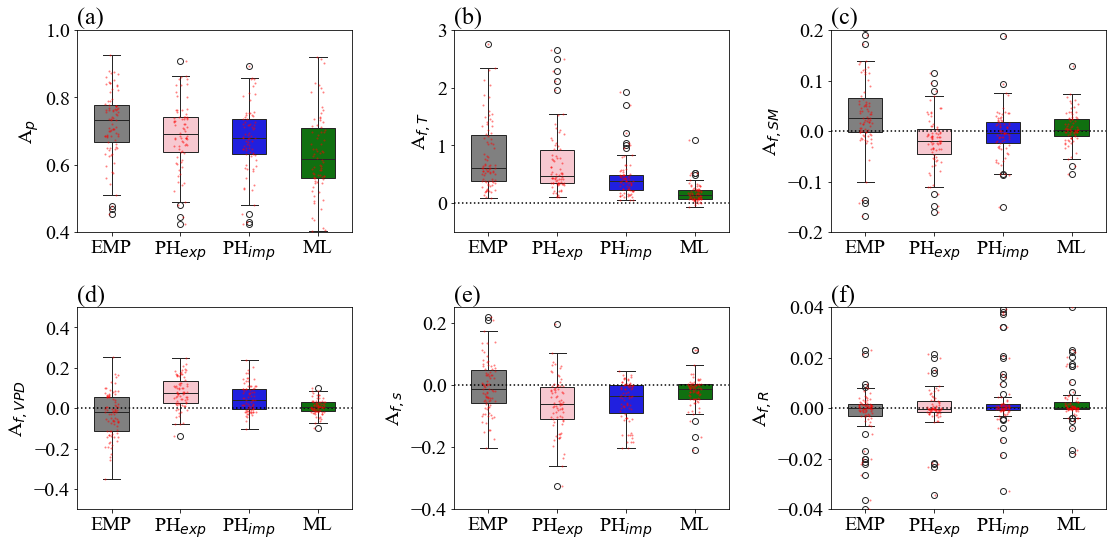

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import mpl_scatter_density
temp_df = im_df[im_df['Category']=="All"]
temp_df = temp_df[temp_df['Model'].isin([r'EMP', r'EXP', r'IMP', r'ML'])]
temp_df['Model'] =  pd.Categorical(temp_df['Model'], categories=['EMP', 'EXP', 'IMP', 'ML'])
temp_df
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 20
font1 = {'size':20}
font2 = {'size':16,'color':'k'}

#----Box Plot----
# a- Ap
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(wspace=0.35, hspace=0.35)

ax = fig.add_subplot(2, 3, 1)
sns.boxplot(x='Model', y='a_p', data=temp_df, ax=ax, palette=['gray', 'pink', 'blue', 'green'], width=0.5)
sns.stripplot(x='Model', y='a_p', data=temp_df, ax=ax, color='red', size=2, alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel(r'A$_{p}$')
ax.set_ylim(0.4, 1) 
ax.set_xticklabels(['EMP', r'PH$_{exp}$', r'PH$_{imp}$', 'ML'])
ax.set_title('(a)', loc='left')

ax = fig.add_subplot(2, 3, 2)
sns.boxplot(x='Model', y='a_ft', data=temp_df, ax=ax, palette=['gray', 'pink', 'blue', 'green'], width=0.5)
sns.stripplot(x='Model', y='a_ft', data=temp_df, ax=ax, color='red', size=2, alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel(r'A$_{f,T}$')
ax.set_ylim(-0.5, 3) 
ax.set_xticklabels(['EMP', r'PH$_{exp}$', r'PH$_{imp}$', 'ML'])
ax.axhline(0, linestyle=':', color='k')
ax.set_title('(b)', loc='left')

ax = fig.add_subplot(2, 3, 3)
sns.boxplot(x='Model', y='a_fu1', data=temp_df, ax=ax, palette=['gray', 'pink', 'blue', 'green'], width=0.5)
sns.stripplot(x='Model', y='a_fu1', data=temp_df, ax=ax, color='red', size=2, alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel(r'A$_{f,SM}$')
ax.set_ylim(-0.2, 0.2) 
ax.set_xticklabels(['EMP', r'PH$_{exp}$', r'PH$_{imp}$', 'ML'])
ax.axhline(0, linestyle=':', color='k')
ax.set_title('(c)', loc='left')

ax = fig.add_subplot(2, 3, 4)
sns.boxplot(x='Model', y='a_fu2', data=temp_df, ax=ax, palette=['gray', 'pink', 'blue', 'green'], width=0.5)
sns.stripplot(x='Model', y='a_fu2', data=temp_df, ax=ax, color='red', size=2, alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel(r'A$_{f,VPD}$')
ax.set_ylim(-0.5, 0.5) 
ax.set_xticklabels(['EMP', r'PH$_{exp}$', r'PH$_{imp}$', 'ML'])
ax.axhline(0, linestyle=':', color='k')
ax.set_title('(d)', loc='left')

ax = fig.add_subplot(2, 3, 5)
sns.boxplot(x='Model', y='a_fs', data=temp_df, ax=ax, palette=['gray', 'pink', 'blue', 'green'], width=0.5)
sns.stripplot(x='Model', y='a_fs', data=temp_df, ax=ax, color='red', size=2, alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel(r'A$_{f,s}$')
ax.set_ylim(-0.4, 0.25) 
ax.set_xticklabels(['EMP', r'PH$_{exp}$', r'PH$_{imp}$', 'ML'])
ax.axhline(0, linestyle=':', color='k')
ax.set_title('(e)', loc='left')

ax = fig.add_subplot(2, 3, 6)
sns.boxplot(x='Model', y='a_fr', data=temp_df, ax=ax, palette=['gray', 'pink', 'blue', 'green'], width=0.5)
sns.stripplot(x='Model', y='a_fr', data=temp_df, ax=ax, color='red', size=2, alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel(r'A$_{f,R}$')
ax.set_ylim(-0.04, 0.04) 
ax.set_xticklabels(['EMP', r'PH$_{exp}$', r'PH$_{imp}$', 'ML'])
ax.axhline(0, linestyle=':', color='k')
ax.set_title('(f)', loc='left')
plt.tight_layout()
plt.savefig("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/Docs/Figures/information_metrics_Fig1_updated.png", dpi=600)
plt.show()

In [95]:
im_df['A_fp'] = np.abs(im_df['a_fu1']) + np.abs(im_df['a_fu2']) + np.abs(im_df['a_fs']) + np.abs(im_df['a_fr'])

In [101]:
im_df

,Site,Model,Category,a_p,a_fu1,a_fu2,a_fs,a_fr,a_ft,a_fp,A_fp
0,AR-SLu,EMP,All,0.750542,0.111981,-0.001333,-0.118528,0.007881,0.515745,0.239723,0.239723
1,AR-SLu,EMP,Dry,0.721928,0.033744,0.142788,-0.182303,0.005771,0.065384,0.364606,0.364606
2,AR-SLu,EMP,Mesic,0.760723,0.043629,0.113018,-0.160516,0.003869,0.227425,0.321031,0.321031
3,AR-SLu,EMP,Wet,0.744235,0.139023,0.127985,-0.294658,0.027650,0.137586,0.589315,0.589315
4,AR-SLu,EXP,All,0.765729,0.036996,0.137997,-0.178188,0.003195,0.347381,0.356376,0.356376
...,...,...,...,...,...,...,...,...,...,...,...
2107,ZM-Mon,ML,Wet,0.713732,-0.000911,0.152276,-0.151312,-0.000052,0.157322,0.304552,0.304552
2108,ZM-Mon,ML_XGB,All,0.538123,0.000753,0.002496,-0.003730,0.000481,0.221349,0.007460,0.007460
2109,ZM-Mon,ML_XGB,Dry,0.670570,0.061865,0.074987,-0.151879,0.015027,0.293576,0.303759,0.303759
2110,ZM-Mon,ML_XGB,Mesic,0.570302,0.051017,0.000774,-0.051914,0.000123,0.221491,0.103828,0.103828


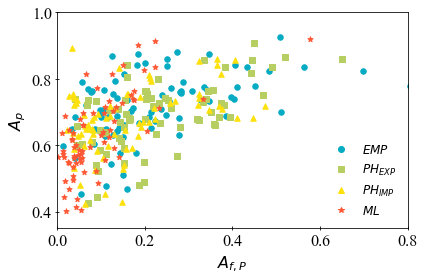

In [116]:
markers = [ 'o', 's', '^', '*']
legend_elements = [Line2D([0], [0], marker= markers[0], linestyle='', color=model_colors[0], label=r'$EMP$'),
                   Line2D([0], [0], marker=markers[1], linestyle='', color=model_colors[1], label=r'$PH_{EXP}$'),
                   Line2D([0], [0], marker=markers[2], linestyle='', color=model_colors[2], label=r'$PH_{IMP}$'),
                   Line2D([0], [0], marker=markers[3], linestyle='', color=model_colors[3], label=r'$ML}$')]
sites = np.unique(im_df['Site'])
for mod, color, marker in zip(mod_list_labels, model_colors, markers):
    for site_i in sites:
        x_fp = im_df['A_fp'][(im_df['Site']==site_i) & (im_df['Category']=="All") & (im_df['Model']==mod)]
        x_p = im_df['a_p'][(im_df['Site']==site_i) & (im_df['Category']=="All") & (im_df['Model']==mod)]
        plt.scatter(x_fp, x_p, marker=marker, color=color, s=30)
plt.xlim([0, 0.8])
plt.ylim([0.35, 1])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8])
plt.yticks([0.4, 0.6, 0.8, 1.0])
plt.tick_params(direction='inout')
plt.ylabel('$A_{p}$', fontsize=16)
plt.xlabel(r'$A_{f,P}$', fontsize=16)
plt.legend(handles=legend_elements, frameon=False, ncol=1, fontsize=12, loc='lower right')
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("C://Users/ppushpendra/Box/SW_FluxNet_NEW/fresh_run_all_models/Models/Post_Decision_Analysis/WRR/REVIEW_1/Docs/Figures/information_metrics_Fig2.png", dpi=600)

In [117]:
def shannon_entropy(x, bins):
    c = np.histogramdd(x, bins)[0]
    p = c / np.sum(c)
    p = p[p > 0]
    h =  - np.sum(p * np.log2(p))
    return h

In [144]:
x1 = np.array([1,2,3,4,5,6,7,8,9])
x2 = np.array([1,2,3,4,5,6,7,8,9])
shannon_entropy([x1, x2], [3,3])

1.584962500721156

In [128]:
bins = [4, 4, 4]
x = [x1, x2, x3]
x

[array([ 1,  2,  3,  4,  6,  8, 10]),
 array([ 3,  2,  5,  8,  6,  8, 10]),
 array([ 1,  6,  9,  4,  6, 10, 10])]

In [131]:
c = np.histogramdd(x, bins)[0]
c

array([[[1., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 2.]]])

In [141]:
shannon_entropy(x1,3)

1.584962500721156

In [143]:
np.log2(1/3)

-1.5849625007211563

In [142]:
c = np.histogramdd(x1, 3)[0]
c

array([3., 3., 3.])